# Imports and file loading

In [232]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import matplotlib.animation as animation
%matplotlib inline
import imageio
from scipy.ndimage.interpolation import rotate
from math import cos, sin
import time
import random
import string
import optical_imaging as oi
import copy
import oi_file
reload(oi)
reload(oi_file)
from scipy.ndimage.filters import gaussian_filter
import resistive_pulse as rp
import os
pi=3.14159

In [233]:
file_directory_mp4 = '/home/preston/Desktop/Science/Research/cancer_cells/data/10-6-2016/150_17p5-30-17p5/mp4/'
file_path_mp4 = file_directory_mp4 + 'hct-116_no-thick_pr0125_0000.mp4'

file_directory_bvi = '/home/preston/Desktop/Science/Research/cancer_cells/data/10-6-2016/150_17p5-30-17p5/bvi/'
file_path_bvi = file_directory_bvi + 'hct-116_no-thick_pr0125_0000.bvi'

In [234]:
file_directory_mp4 = '/home/preston/Desktop/Science/Research/cancer_cells/data/10-6-2016/300_17p5/'
file_path_mp4 = file_directory_mp4 + 'hct-116_methylcellulose_pr0040_1.mp4'

file_directory_bvi = '/home/preston/Desktop/Science/Research/cancer_cells/data/10-6-2016/300_17p5/'
file_path_bvi = file_directory_bvi + 'hct-116_methylcellulose_pr0040_1.bvi'

In [235]:
vid = oi_file.open_video_connection(file_path_mp4)

# Define template image and stage

- 'first_cell_imaging':
    - c0: 210, 145
    - c1: 207, 129
    - c2: 298, 125
    - c3: 300, 140
    
- 7-4-2016
    - mix_0001
        - c0: 426, 233
        - c1: 426, 217
        - c2: 517, 217
        - c3: 517, 233
        
- 7-10-2016
    - HCT_0000
        - c0:
        - c1:
        - c2:
        - c3:

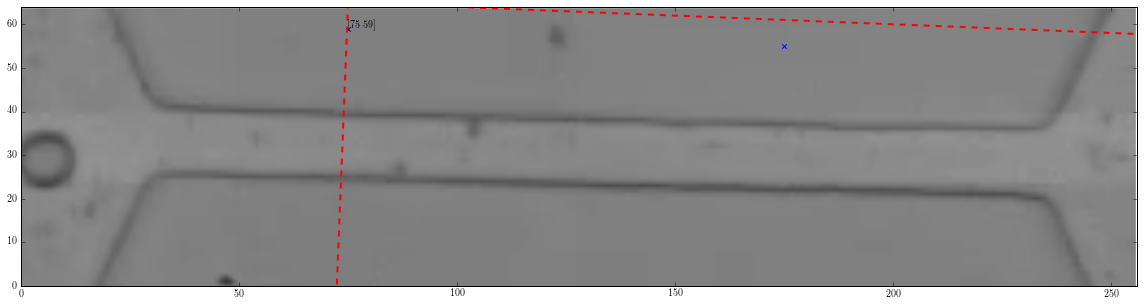

(64, 256)


In [236]:
reload(oi)
template_frame = oi.get_frame_vid(vid, 0)
c0 = np.array([75, 59])
c1 = np.array([75, 71])
c2 = np.array([176, 67])
c3 = np.array([175, 55])
stage = oi.Stage(template_frame, c0, c1, c2, c3)
stage.plot_stage()

print template_frame.shape

In [237]:
print template_frame

[[ 0.51764706  0.51764706  0.51764706 ...,  0.52156863  0.51764706
   0.51764706]
 [ 0.51764706  0.51764706  0.51372549 ...,  0.51372549  0.51764706
   0.51764706]
 [ 0.51372549  0.51372549  0.50980392 ...,  0.51372549  0.51764706
   0.51764706]
 ..., 
 [ 0.51764706  0.51764706  0.52156863 ...,  0.53333333  0.53333333
   0.53333333]
 [ 0.52156863  0.52156863  0.51764706 ...,  0.53333333  0.53333333
   0.53333333]
 [ 0.53333333  0.52941176  0.52156863 ...,  0.53333333  0.53333333
   0.53333333]]


In [238]:
print stage._template_frame.shape

(64, 256)


In [239]:
print raw_events[0]._detections[0]._tf

NameError: name 'raw_events' is not defined

776


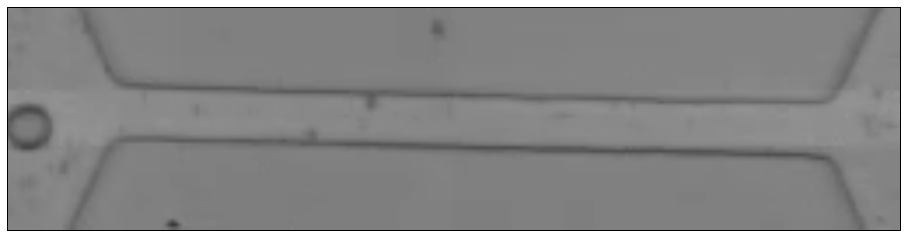

1276


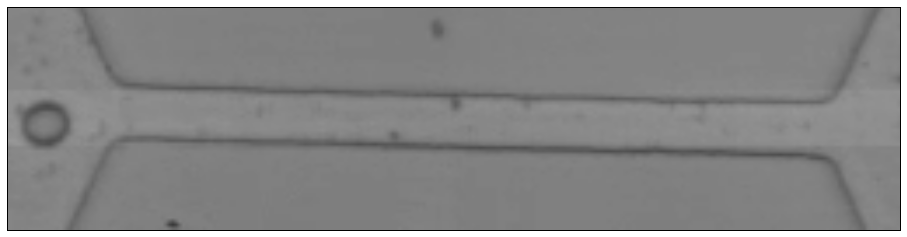

1776


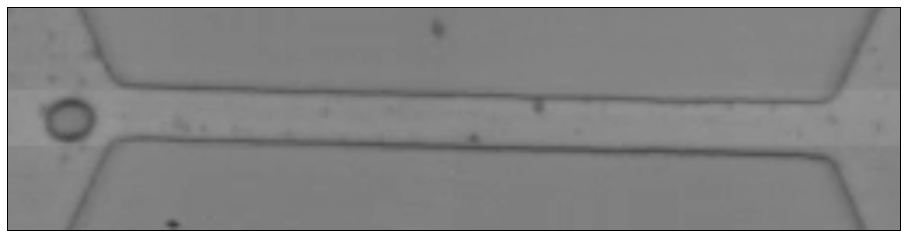

2276


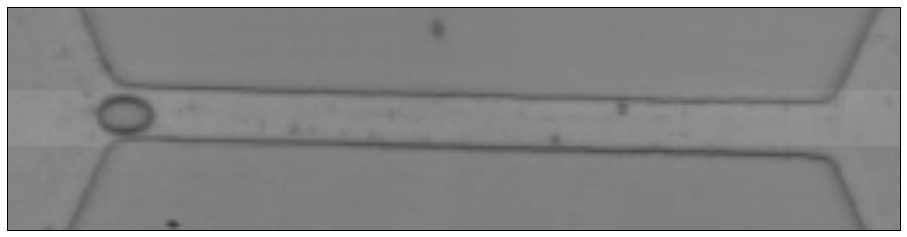

2776


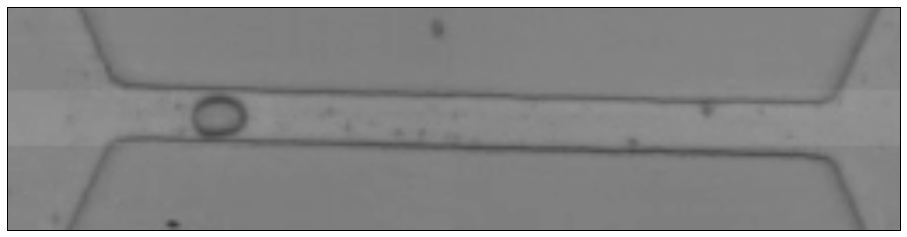

3276


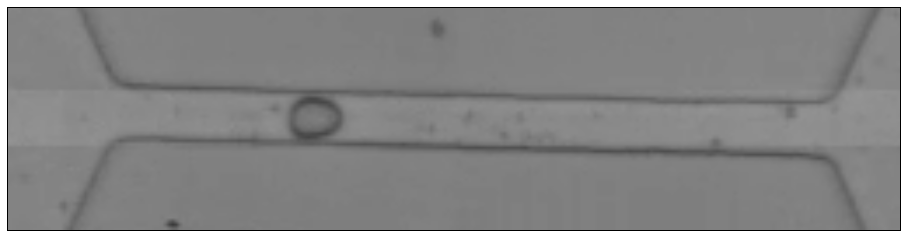

3776


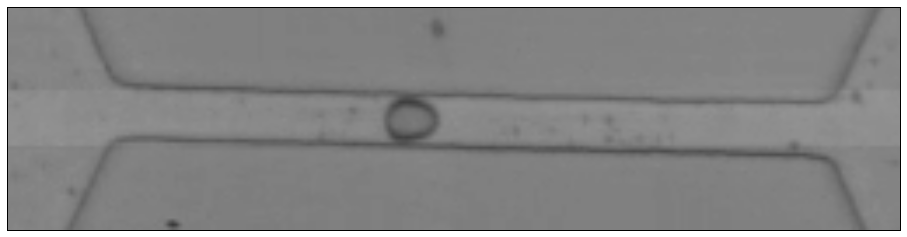

4276


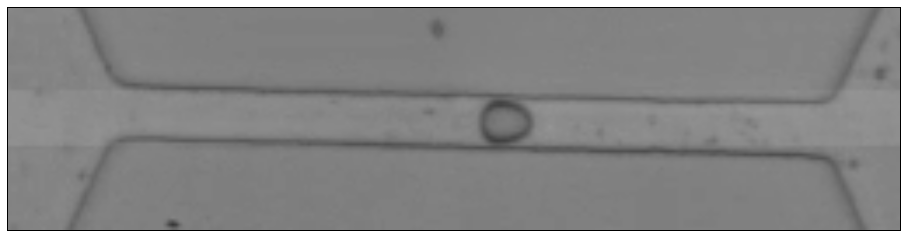

4776


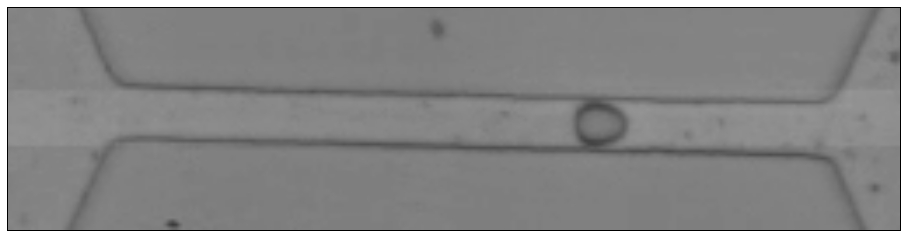

5276


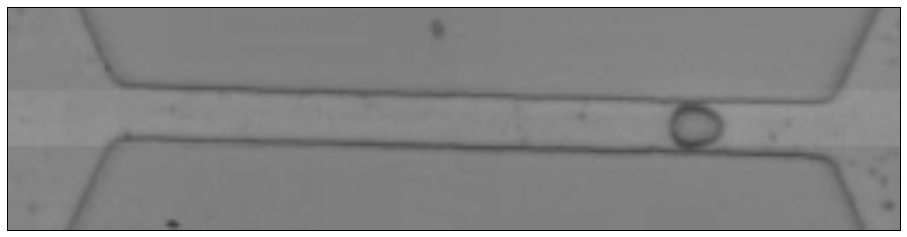

5776


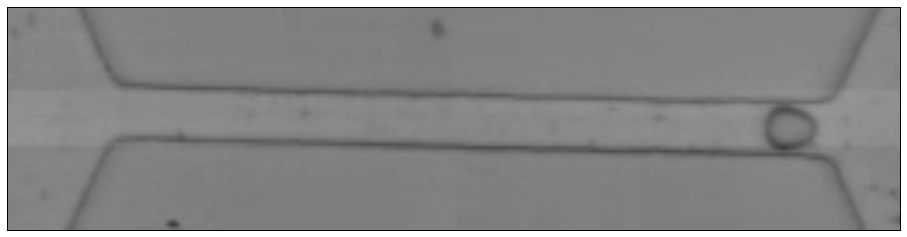

6276


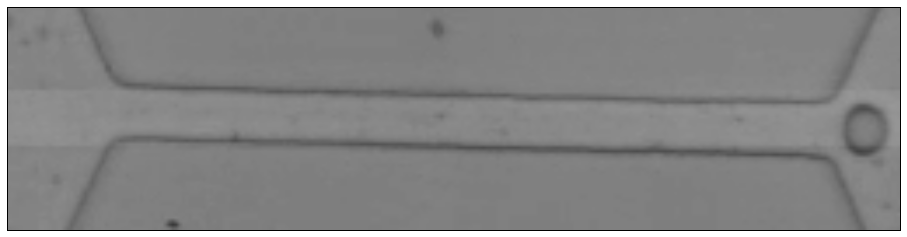

In [251]:
plist = [50*i for i in range(12)]
for i in plist:
    
    fig = plt.figure(figsize = (16,12))
    frames.append(oi_file.get_frame_bvi(file_path_bvi, i, 64, 256))
    plt.imshow(template_frame, vmin = 0.0, vmax = 1., cmap = 'gray', origin = 'lower')
    plt.xticks([])
    plt.yticks([])
    #plt.savefig('/home/preston/Desktop/Science/Research/cancer_cells/nsf_proposal/particle_'+str(i)+'.png', dpi = 300)
    plt.show()

# Find events

0.466667
(64, 256)


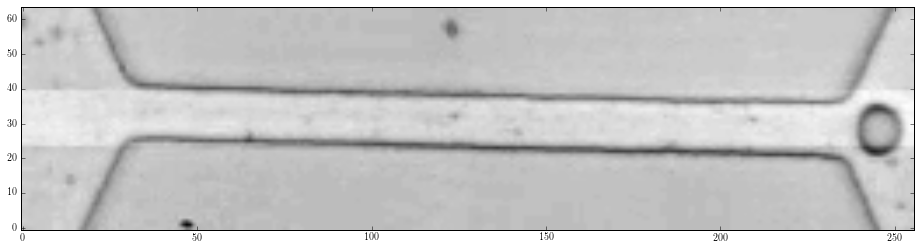

In [252]:
rep_value_0 = .468431
rep_value_1 = .478431
rep_value_2 = .471431
rep_value_3 = .461431
print template_frame[40,120]

print template_frame.shape


temp_template_frame = copy.copy(template_frame)
temp_template_frame[310-10:310+10,148-10:148+10] = rep_value_0
temp_template_frame[270-10:270+10,431-10:431+10] = rep_value_1
temp_template_frame[281-10:281+10,510-10:510+10] = rep_value_2
temp_template_frame[158-10:158+10,491-10:491+10] = rep_value_2
temp_template_frame[70-10:70+10,548-10:548+10] = rep_value_3



fig = plt.figure(figsize = (16,12))
plt.imshow(temp_template_frame,  cmap = 'gray', origin = 'lower')
plt.show()

In [ ]:
reload(oi)
raw_events=oi.find_events_bvi(file_path_bvi, threshold_difference = .03, cluster_threshold = 10, template_frame = template_frame)

##### Save events

In [ ]:
reload(oi_file)

In [ ]:
oi_file.save_oi_events_json('/home/preston/Desktop/Science/Research/cancer_cells/data/10-5-2016/events/\
10um_ps_0_10000fps_events',\
                       raw_events)

In [ ]:
events = copy.deepcopy(raw_events)

##### Load events

In [ ]:
reload(oi_file)
reload(oi)

In [ ]:
events = oi_file.load_oi_events_json('/home/preston/Desktop/Science/Research/cancer_cells/data/10-5-2016/events/\
10um_ps_0_10000fps_events')

print len(events)

### Event post-processing

##### Connect loose

In [ ]:
print len(events)
events = oi.connect_loose_events(copy.deepcopy(events), tf_sep_threshold = 5, dist_threshold = 10)
print len(events)

##### Remove events that don't enter, exit channel

In [ ]:
for i, event in enumerate(events):
    event.get_channel_enter_exit_tf(stage)
    
print len(events)
events = [event for event in events if (event._channel_enter_tf != None) and (event._channel_exit_tf != None)]
print len(events)

# Create trajectory plot

In [ ]:
fig = plt.figure(figsize = (20,12))

#colors = cm.rainbow()

#gs = gs.GridSpec(2, 2)

for i, event in enumerate(events):
    px = []
    py = []
    for detection in event._detections:
        px.append(detection._px)
        py.append(detection._py)
    plt.plot(px, py, lw = 1.5)

plt.imshow(template_frame, alpha=0.8, cmap = 'gray', origin = 'lower')
plt.xticks([])
plt.yticks([])

fig.tight_layout()

plt.savefig('/home/preston/Desktop/Science/Research/cancer_cells/10-5-2016_10um_0_10000fps.png', dpi = 300)

plt.show()

In [ ]:
file_directory_bvi = '/home/preston/Desktop/Science/Research/cancer_cells/data/8-18-2016/oi_rp/bvi/'
file_directory_gallery = file_directory_bvi.split('bvi')[0] + 'events/oi_gallery/'
if not os.path.exists(file_directory_gallery):
    os.makedirs(file_directory_gallery)
    
gallery_base_name = '/home/preston/Desktop/Science/Research/cancer_cells/data/8-18-2016/oi_rp/bvi/HCT-116_pr0005_0000.bvi'
gallery_base_name = gallery_base_name.split('bvi')[-2].replace('/', '').replace('.','')+'_'

In [ ]:
def create_event_gallery(event_num):
    px_list = []
    py_list = []
    
    directory = file_directory_bvi.split('/')[0]+'/'
    
    for i, det in enumerate(events[event_num]._detections[:1]):
        px_list.append(det._px)
        py_list.append(det._py)
        fig = plt.figure(figsize = ((12,6)))
        plt.imshow(oi_file.get_frame_bvi(file_path_bvi, det._tf, 256, 512), alpha=0.5, cmap = 'gray', origin = 'lower')
        
        plt.plot(px_list, py_list)
        
        plt.savefig(file_directory_gallery + gallery_base_name + str(event_num) + '-' + str(i) + '.png' )

# Find particle edges

In [275]:
template_index = 0
#indices = [790, 800, 810, 820, 830, 832, 834, 836, 838, 840, 842, 844, 846, 848, 850, 852, 854, 856, 858, 860, 870, 880]
indices = [50*i for i in range(1,12)]

alpha = 1#2.5
beta = 0#-.35

template_frame = oi_file.change_frame_contrast(oi_file.get_frame_bvi(file_path_bvi, template_index, 64, 256), alpha = alpha, beta = beta)
frames = [oi_file.change_frame_contrast(oi_file.get_frame_bvi(file_path_bvi, index, 64, 256), alpha = alpha, beta = beta) for index in indices]

###### Edit template frame

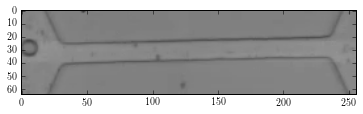

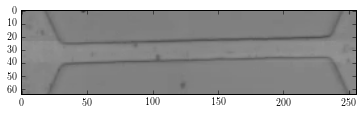

In [276]:
plt.imshow(template_frame, cmap = 'gray', vmin = 0, vmax = 1)
plt.show()

temp_template_frame = copy.copy(template_frame)
temp_template_frame[20:40, 0:25] = frames[5][20:40, 0:25]

plt.imshow(temp_template_frame, cmap = 'gray', vmin = 0, vmax = 1)
plt.show()

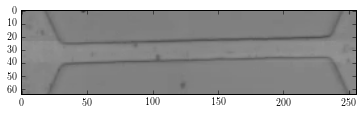

In [277]:
template_frame = copy.copy(temp_template_frame)
plt.imshow(template_frame, cmap = 'gray', vmin = 0, vmax = 1)
plt.show()

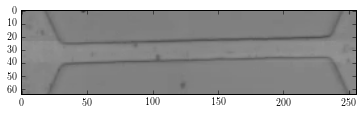

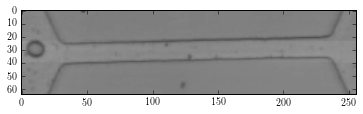

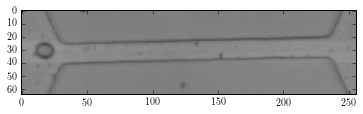

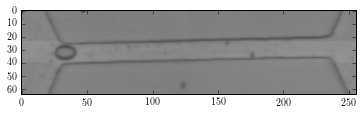

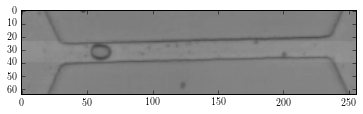

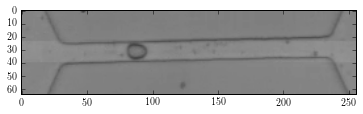

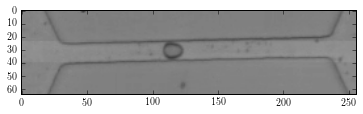

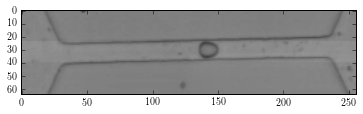

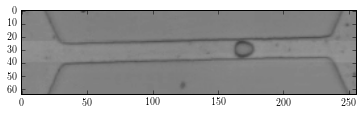

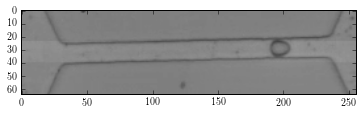

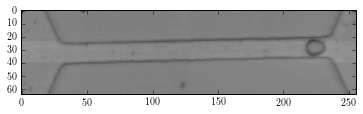

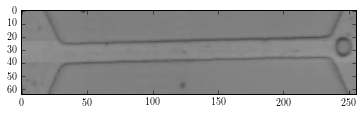

In [278]:
plt.imshow(template_frame, cmap = 'gray', vmin = 0, vmax = 1)
plt.show()
for frame in frames:
    plt.imshow(frame, cmap = 'gray', vmin = 0, vmax = 1)
    plt.show()

In [279]:
centers = np.empty((len(indices), 2), dtype = int)
clusters = []
for i, frame in enumerate(frames):
    pixels = oi.find_clusters_percentage_based(frame, template_frame, threshold_difference = .03, cluster_threshold = 40)[0]
    clusters.append(pixels)
    centers[i,0] = int((np.max(pixels[:,0] + np.min(pixels[:,0])))/2)
    centers[i,1] = int((np.max(pixels[:,1] + np.min(pixels[:,1])))/2)

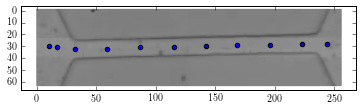

In [280]:
plt.imshow(template_frame, vmin = 0, vmax = 1, cmap = 'gray')

for center in centers:
    plt.scatter(center[1], center[0])
plt.show()

0


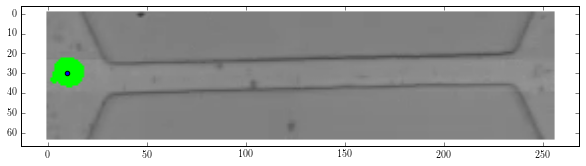

1


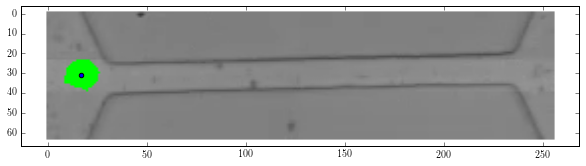

2


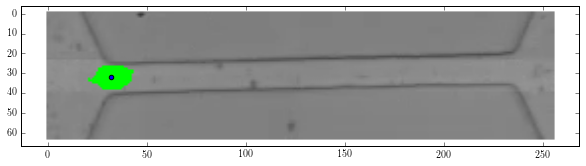

3


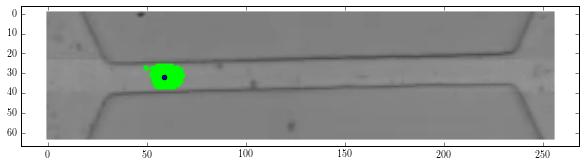

4


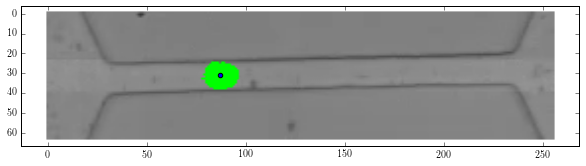

5


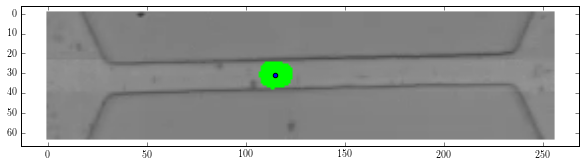

6


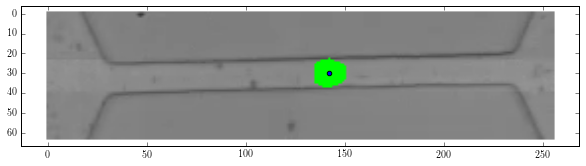

7


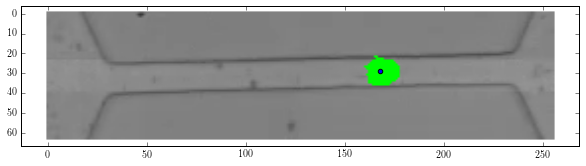

8


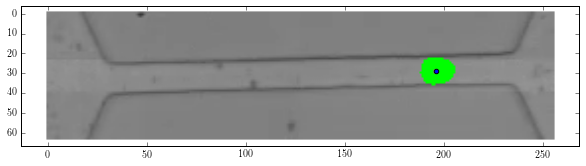

9


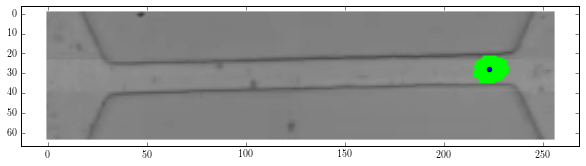

10


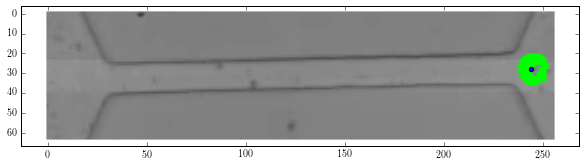

In [281]:
for i, frame in enumerate(frames):
    temp_template_frame = np.empty((template_frame.shape[0], template_frame.shape[1], 3))
    for j in range(template_frame.shape[0]):
        for k in range(template_frame.shape[1]):
            temp_template_frame[j, k, :] = template_frame[j, k]
    for pix in clusters[i]:
        temp_template_frame[pix[0], pix[1]] = [0, 1., 0]
    print i
    fig = plt.figure(figsize = (10,6))
    plt.imshow(temp_template_frame, vmin = 0, vmax = 1)
    plt.scatter(centers[i,1], centers[i,0])
    plt.show()
            

# Canny method
- image preprocessing
- convolve image with Sobel kernels to find gradients; gradient direction is rounded to one of four angles
- non-maximum suppression: (thinning the edges)
- Hysteresis thresholding: check to see if maximum gradient in a detected edge exceeds a max value, or falls below a min value

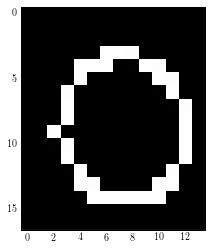

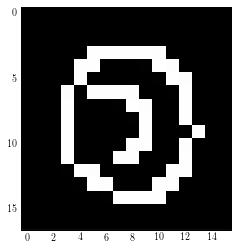

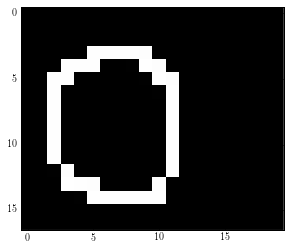

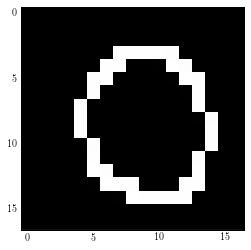

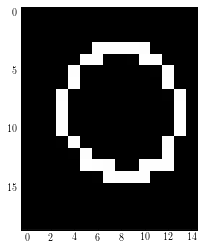

In [231]:
delta = 3

for i, frame in enumerate(frames[:5]):
    frame_temp = cv2.GaussianBlur(frames[i], (5,5), 0)
    window = cv2.cvtColor(np.uint8(256*\
                                   frame_temp[clusters[i][:,0].min()- delta:clusters[i][:,0].max()+delta, clusters[i][:,1].min()-delta:clusters[i][:,1].max()+delta]),\
                                   cv2.COLOR_GRAY2BGR)
    edges = cv2.Canny(window, 5, 80)
    #plt.imshow(window, cmap = 'gray', vmin = 0, vmax = 1)
    plt.imshow(edges, zorder = 100, cmap = 'gray', interpolation = 'none')
    #plt.imshow(frame_temp, cmap = 'gray', vmin = 0, vmax = 1)
    plt.show()

In [171]:
new_template_frame = cv2.cvtColor(np.uint8(256*template_frame), cv2.COLOR_GRAY2BGR)
new_frame = cv2.cvtColor(np.uint8(256*frame), cv2.COLOR_GRAY2BGR)

In [184]:
edges_0 = cv2.Canny(new_template_frame, 15, 20)
edges_1 = cv2.Canny(new_frame, 15, 60)
edges_2 = edges_1 - edges_0

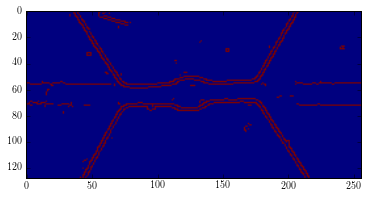

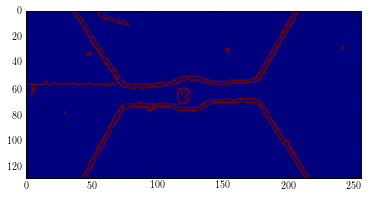

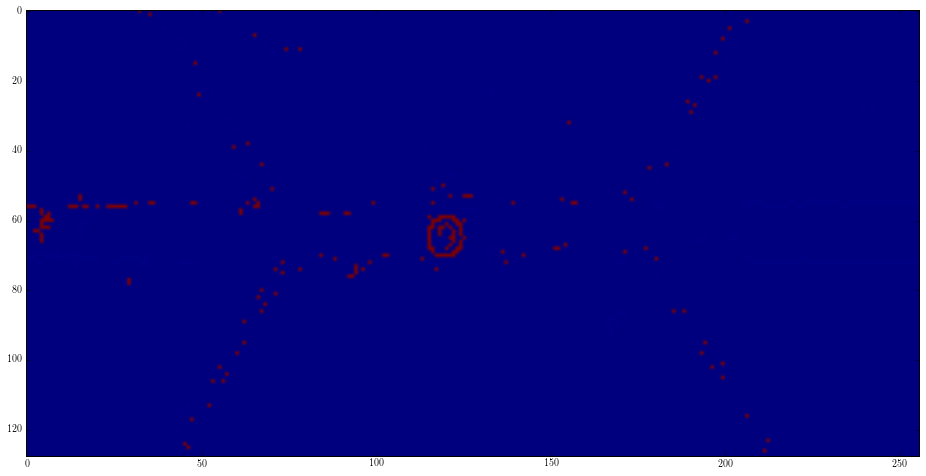

In [186]:
plt.imshow(edges_0)
plt.show()

plt.imshow(edges_1)
plt.show()

fig = plt.figure(figsize = (16,10))
plt.imshow(edges_2)
plt.show()

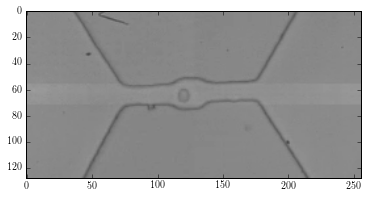

In [143]:
index = 10
frame = frames[index]
plt.imshow(frame, cmap = 'gray', vmin = 0, vmax = 1)
plt.show()

In [146]:
print cluster

[[ 60 117]
 [ 60 118]
 [ 60 119]
 [ 60 120]
 [ 60 121]
 [ 60 122]
 [ 61 122]
 [ 61 123]
 [ 62 123]
 [ 63 123]
 [ 63 124]
 [ 64 124]
 [ 65 124]
 [ 66 124]
 [ 67 124]
 [ 67 123]
 [ 68 123]
 [ 69 123]
 [ 69 122]
 [ 69 121]
 [ 70 121]
 [ 70 120]
 [ 70 119]
 [ 69 119]
 [ 69 120]
 [ 68 120]
 [ 68 121]
 [ 68 122]
 [ 67 122]
 [ 67 121]
 [ 67 120]
 [ 67 119]
 [ 68 119]
 [ 68 118]
 [ 69 118]
 [ 69 117]
 [ 69 116]
 [ 68 116]
 [ 68 117]
 [ 67 117]
 [ 67 118]
 [ 66 118]
 [ 66 119]
 [ 66 120]
 [ 66 121]
 [ 66 122]
 [ 66 123]
 [ 65 123]
 [ 65 122]
 [ 65 121]
 [ 65 120]
 [ 65 119]
 [ 65 118]
 [ 65 117]
 [ 66 117]
 [ 66 116]
 [ 67 116]
 [ 67 115]
 [ 66 115]
 [ 65 116]
 [ 64 116]
 [ 64 117]
 [ 64 118]
 [ 64 119]
 [ 63 118]
 [ 63 117]
 [ 63 116]
 [ 62 116]
 [ 62 117]
 [ 62 118]
 [ 62 119]
 [ 62 120]
 [ 62 121]
 [ 62 122]
 [ 63 122]
 [ 64 122]
 [ 64 123]
 [ 64 121]
 [ 63 121]
 [ 61 121]
 [ 61 120]
 [ 61 119]
 [ 61 118]
 [ 61 117]
 [ 61 116]
 [ 64 115]]


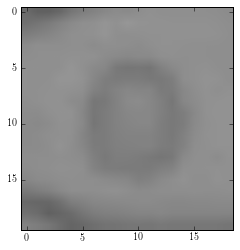

In [148]:
cluster = clusters[index]
pixels = frame[np.min(cluster[:,0]-5):np.max(cluster[:,0]+5), np.min(cluster[:,1]-5):np.max(cluster[:,1]+5)]
plt.imshow(pixels, cmap = 'gray', vmin = 0, vmax = 1)
plt.show()

In [ ]:
pixels_temp = 

In [ ]:
grad_mags = np.zeros((pixels.shape[0], pixels.shape[1]))
grad_direcs = np.zeros((pixels.shape[0], pixels.shape[1]))
for pix in pixels:
    for i in range()
    

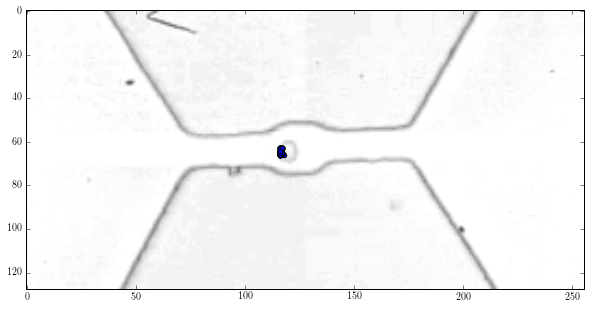

In [128]:
fig = plt.figure(figsize = (10,6))
for coord in coords:
    plt.scatter(coord[1], coord[0])
plt.imshow(frame, cmap = 'gray', vmin = 0, vmax = 1)
plt.show()

# 1-D derivative method

In [282]:
reload(rp)

<module 'resistive_pulse' from 'resistive_pulse.pyc'>

In [297]:
offset = 1

for i in range(1):#len(clusters)):
    boundaries_x_x = []
    boundaries_y_x = []
    start_row = np.min(clusters[i][:,0])-offset
    stop_row = np.max(clusters[i][:,0])+offset
    
    offset = 2
    start_column = np.min(clusters[i][:,1])-offset
    stop_column = np.max(clusters[i][:,1])+offset
    
    
    print i
    for j in range(start_row, stop_row+1):
        data = gaussian_filter(frames[i][j, start_column:stop_column+1] + i*offset, sigma = 1)
        maxima, minima = rp.get_maxima_minima(data, num_maxima = 0, num_minima = 2, return_by = 'low')

        if len(minima) == 2:
            boundaries_x_x.append(start_column + minima[0])
            boundaries_x_x.append(start_column + minima[1])
            boundaries_y_x.append(j)
            boundaries_y_x.append(j)                  
        
    for j in range(start_column, stop_column+1):
        data = gaussian_filter(frames[i][start_row:stop_row+1, j] + i*offset, sigma = 1)
        maxima, minima = rp.get_maxima_minima(data, num_maxima = 0, num_minima = 2, return_by = 'low')

        if len(minima) == 2:
            boundaries_x_x.append(start_row + minima[0])
            boundaries_x_x.append(start_row + minima[1])
            boundaries_y_x.append(j)
            boundaries_y_x.append(j)          
            

0
22
22
(21,)
22
23
(21,)
22
24
(21,)
22
25
(21,)
22
26
(21,)
22
27
(21,)
22
28
(21,)
22
29
(21,)
22
30
(21,)
22
31
(21,)
22
32
(21,)
22
33
(21,)
22
34
(21,)
22
35
(21,)
22
36
(21,)
22
37
(21,)
22
38
(21,)
22
0
(17,)
22
1
(17,)
22
2
(17,)
22
3
(17,)
22
4
(17,)
22
5
(17,)
22
6
(17,)
22
7
(17,)
22
8
(17,)
22
9
(17,)
22
10
(17,)
22
11
(17,)
22
12
(17,)
22
13
(17,)
22
14
(17,)
22
15
(17,)
22
16
(17,)
22
17
(17,)
22
18
(17,)
22
19
(17,)
22
20
(17,)


In [440]:
offset = -1

boundaries_x = [np.empty((0,2), dtype = int) for i in range(len(clusters))]
boundaries_y = [np.empty((0,2), dtype = int) for i in range(len(clusters))]


for i in range(len(clusters)):
    start_row = np.min(clusters[i][:,0])-offset
    stop_row = np.max(clusters[i][:,0])+offset
    
    start_column = np.min(clusters[i][:,1])
    stop_column = np.max(clusters[i][:,1])
    
    for j in range(start_row, stop_row+1):
        data = gaussian_filter(frames[i][j, start_column:stop_column+1], sigma = 1)
        maxima, minima = rp.get_maxima_minima(data, num_maxima = 0, num_minima = 2, return_by = 'low')

        if len(minima) == 2:
            
            
            boundaries_x[i] = np.vstack((boundaries_x[i], [start_column + minima[0], j]))
            boundaries_x[i] = np.vstack((boundaries_x[i], [start_column + minima[1], j]))
            
            
    start_row = np.min(clusters[i][:,0])
    stop_row = np.max(clusters[i][:,0])
    
    start_column = np.min(clusters[i][:,1])-offset
    stop_column = np.max(clusters[i][:,1])+offset
    
    for j in range(start_column, stop_column+1):
        data = gaussian_filter(frames[i][start_row:stop_row+1, j], sigma = 1)
        maxima, minima = rp.get_maxima_minima(data, num_maxima = 0, num_minima = 2, return_by = 'low')

        if len(minima) == 2:
            boundaries_y[i] = np.vstack((boundaries_y[i], [j, start_row + minima[0]]))
            boundaries_y[i] = np.vstack((boundaries_y[i], [j, start_row + minima[1]]))
            

In [441]:
boundaries = []
for i in range(len(boundaries_x)):
    boundaries.append(np.vstack((boundaries_x[i], boundaries_y[i])))

### Remove outliers

In [448]:
max_dist = 2
remove_list = []
for i in range(len(frames)):
    for j in range(boundaries[i].shape[0]):
        distances = ((boundaries[i][j,0]-boundaries[i][[k for k in range(boundaries[i].shape[0]) if k != j],0])**2.+\
        (boundaries[i][j,1]-boundaries[i][[k for k in range(boundaries[i].shape[0]) if k != j],1])**2.)**.5
        min_dist = np.min(distances)
        
        if min_dist > max_dist:
            remove_list.append(j)
            
    boundaries[i] = boundaries[i][[k for k in range(boundaries[i].shape[0]) if k not in remove_list],:]

### Calculate centroids

In [444]:
centroids = [np.zeros((2), dtype = float) for i in range(len(frames))]
for i in range(len(frames)):
    centroids[i][0] = np.mean(boundaries[i][:,0])
    centroids[i][1] = np.mean(boundaries[i][:,1])

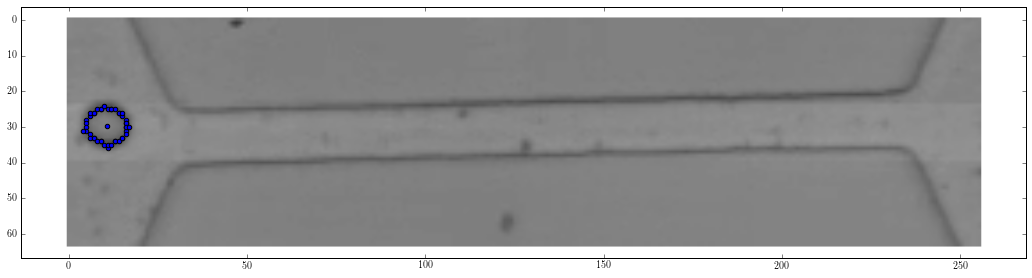

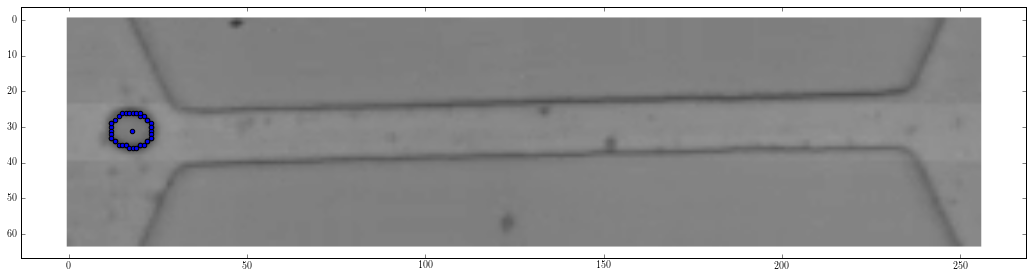

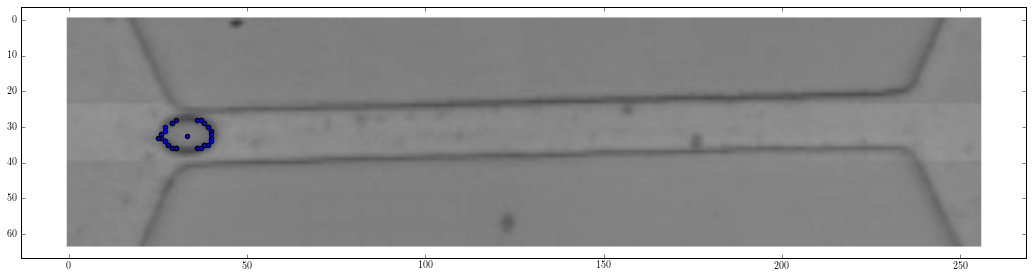

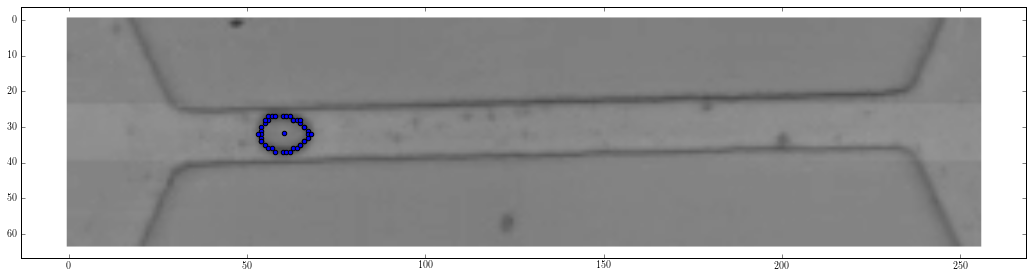

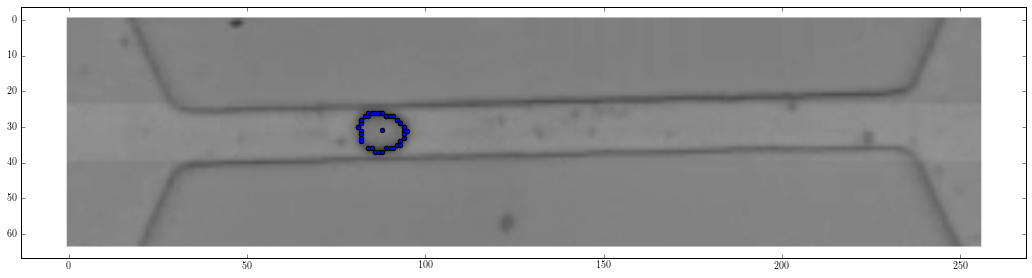

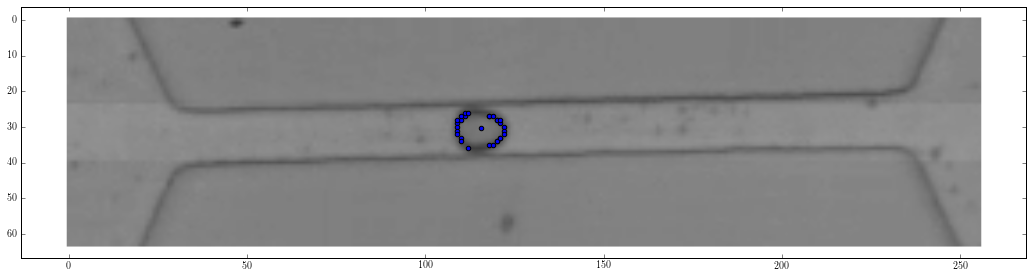

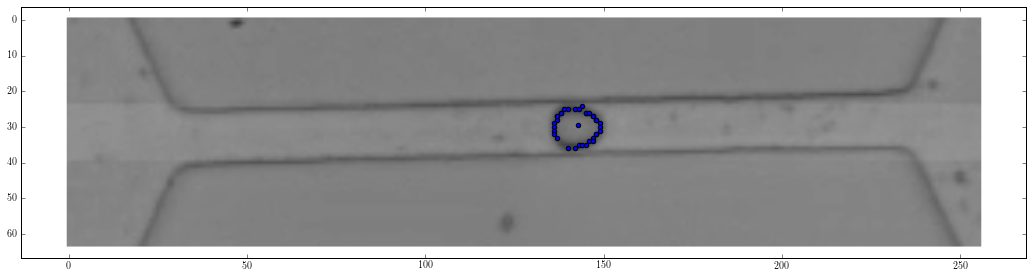

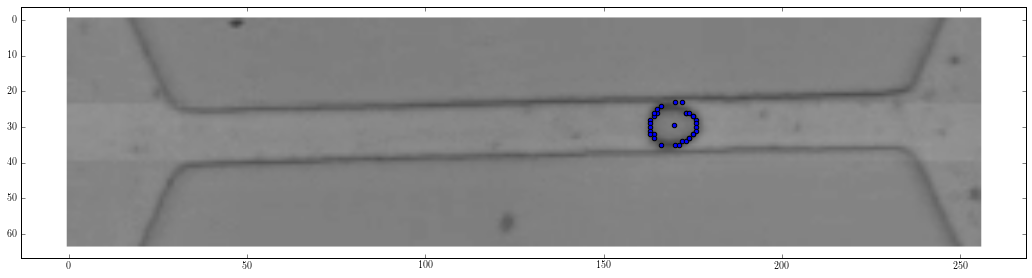

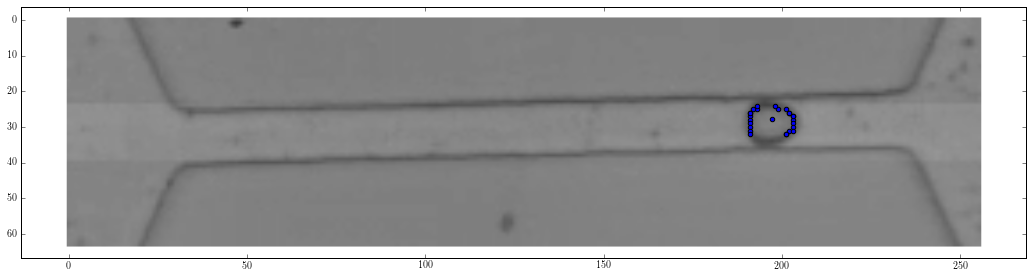

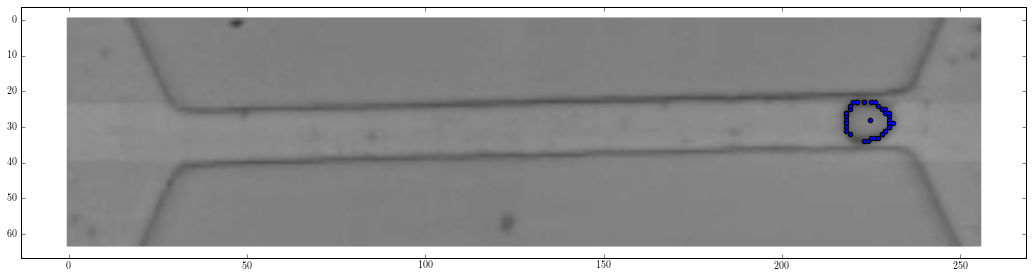

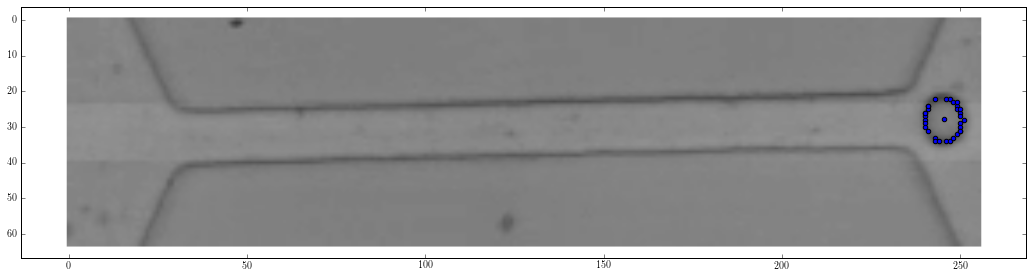

In [446]:
for i in range(len(frames)):
    index = i

    fig = plt.figure(figsize = (18, 12))

    plt.imshow(frames[index], vmin = 0, vmax = 1, cmap = 'gray')
    
    plt.scatter(centroids[i][0], centroids[i][1])
    plt.scatter(boundaries[index][:,0], boundaries[index][:,1])
    plt.show()

# Plot radius vs theta

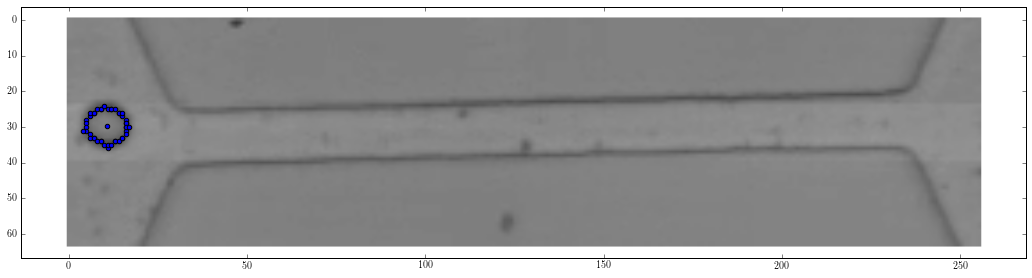

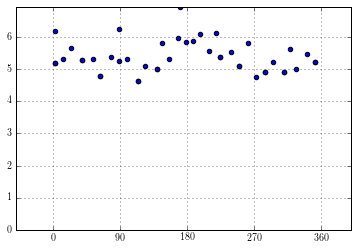

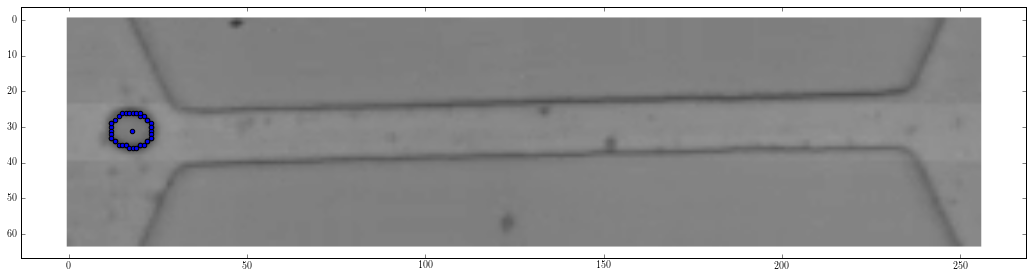

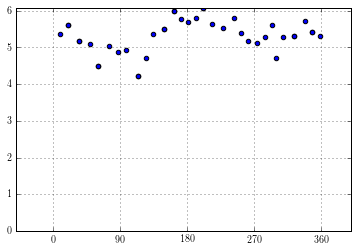

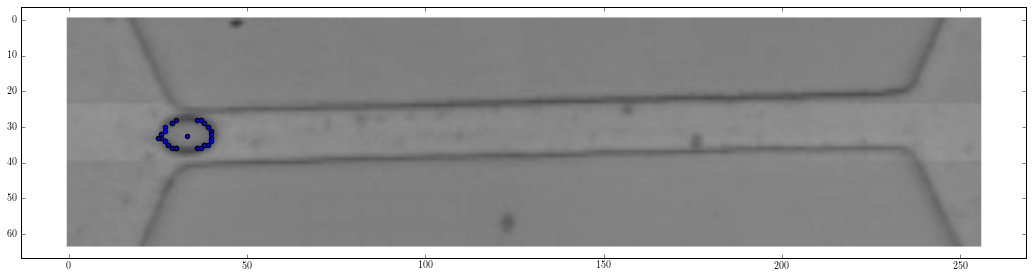

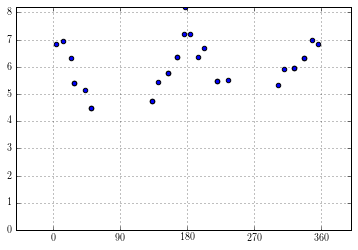

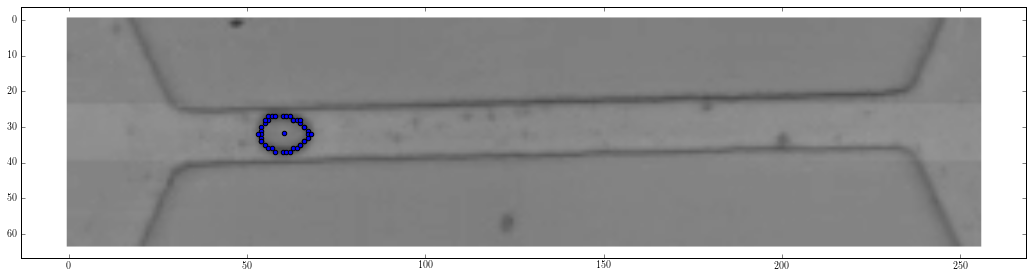

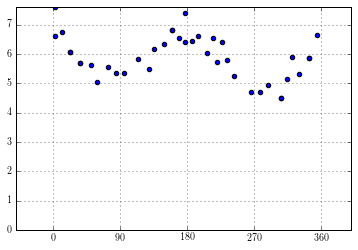

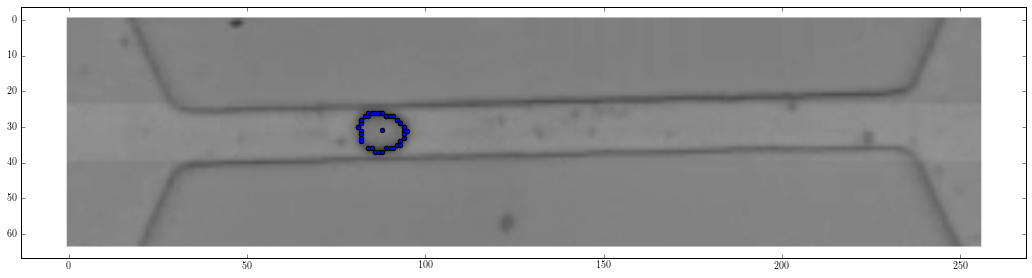

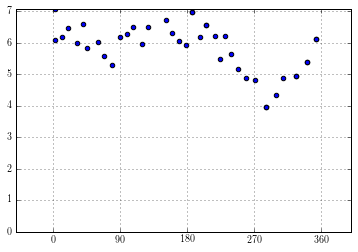

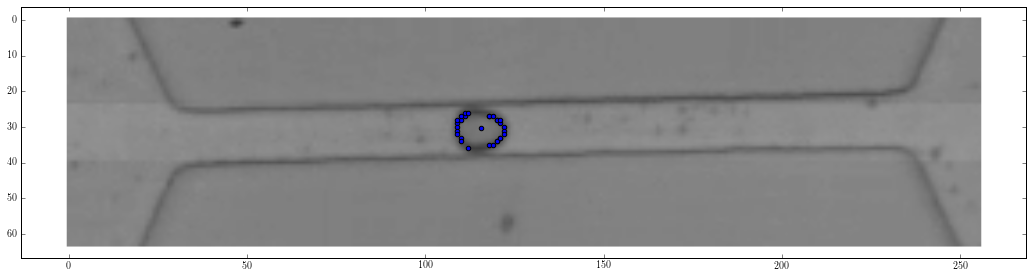

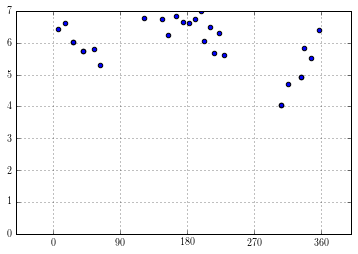

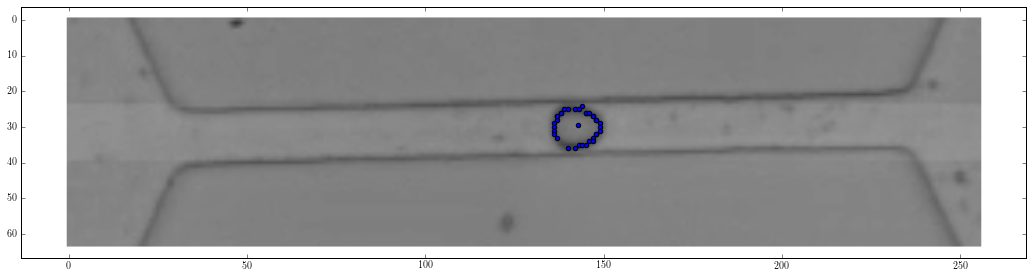

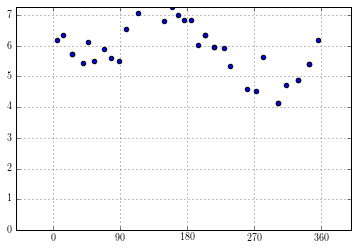

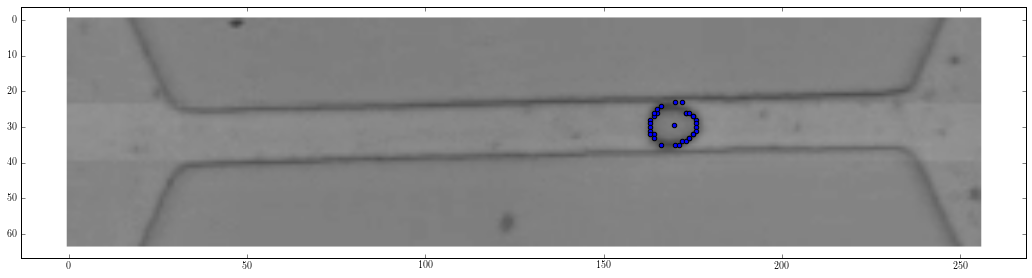

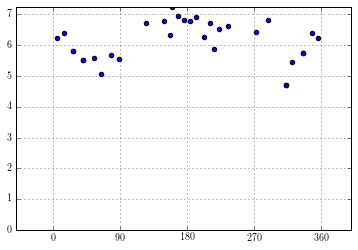

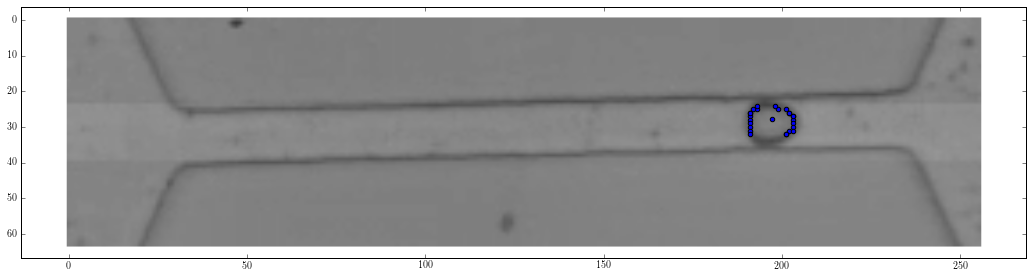

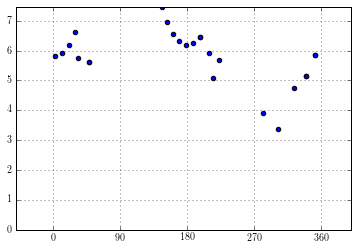

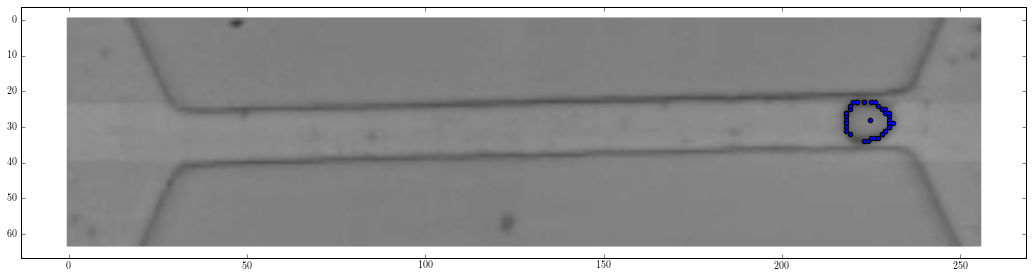

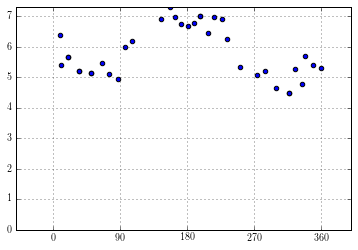

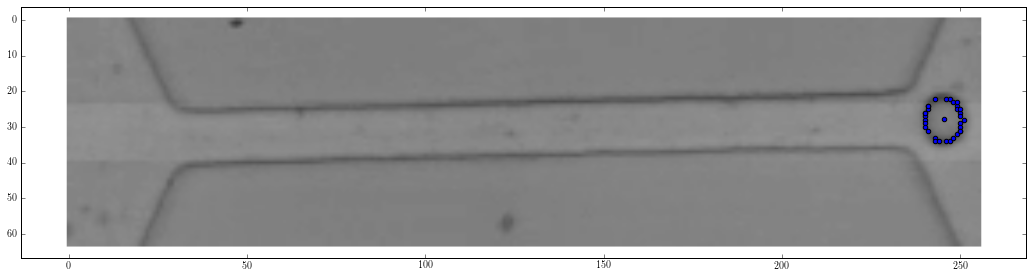

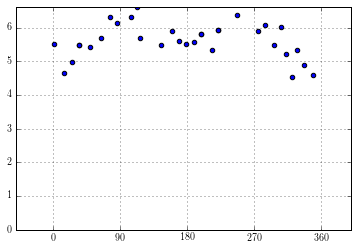

In [447]:
for i in range(len(frames)):
    thetas = []
    rs = []
    for j in range(boundaries[i].shape[0]):
        dx = boundaries[i][j,0] - centroids[i][0]
        dy = boundaries[i][j,1] - centroids[i][1]
        theta = np.arctan2(dy, dx)
        if theta < 0:
            theta += 2*3.14159
        theta = theta*180/3.14159
        thetas.append(theta)
                
        rs.append((dx**2.+dy**2.)**.5)
        
    fig = plt.figure(figsize = (18,12))
    plt.imshow(frames[i], cmap = 'gray', vmin = 0, vmax = 1)
    plt.scatter(centroids[i][0], centroids[i][1])
    plt.scatter(boundaries[i][:,0], boundaries[i][:,1])
    plt.show()
    plt.scatter(thetas, rs)
    plt.ylim(0, max(rs))
    plt.xticks([0, 90, 180, 270, 360])
    plt.grid()
    plt.show()

# Plot aspect ratio

In [449]:
aspects = []
for i in range(len(frames)):
    print np.max(boundaries[i][:,0]), np.min(boundaries[i][:,0]), np.max(boundaries[i][:,1]), np.min(boundaries[i][:,1])
    
    aspects.append(1.*(np.max(boundaries[i][:,0])-np.min(boundaries[i][:,0]))/(np.max(boundaries[i][:,1])-np.min(boundaries[i][:,1])))

17 4 36 24
23 12 36 26
40 25 36 28
68 53 37 27
95 81 37 26
122 109 35 26
149 136 36 24
176 163 35 23
203 191 32 24
231 218 34 23
251 240 34 22


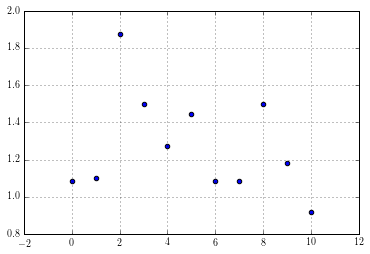

In [452]:
plt.scatter([i for i in range(len(aspects))], aspects)
plt.grid()
plt.show()